<a href="https://colab.research.google.com/github/Kristian209/Data-lit/blob/master/Airpods_Sent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install twython
!pip install tweepy
!pip install vaderSentiment

  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython
     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt, numpy as np, random as rd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [0]:
consumer_key = '98J5EkEHHEI4dTKkfURLREyS6'
consumer_secret = 'xpj8spEwa4Kl88ILoSMAzeQgtGeKPOA9CG2YO7M4SG65m99vu6'
access_token = '1093937831444045824-LAd38h1XnyU1zNlbvV7NxRp1gi95CM'
access_token_secret = 'Yv5C2SDsytBToMi1u7AiNMMofYjj2cRxaHOYyfs1Ci5Hh'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('Air Pods', count=200)

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))

print(tweets[0].created_at)

,Tweets
0,RT @rainnwilson: Apple air pods that allow you...
1,my sister just bought me fake air pods https:/...
2,@mchooyah I'm too poor for Air Pods
3,I got me some air pods
4,my religion is Air Pods
5,@93IN_kitaeri スマホはカールコードストラップを付けてカラビナでジーンズのベルト...
6,@truckerrrrr Our trucks are all fitted with po...
7,@Hannah23RP Apple said the same shit when the ...
8,เหลือ i pad Air pods ถ้ามีกะตังจะซื้อเลย https...
9,Left my wallet and my air pods at home. 🤦🏾‍♀️ ...


2019-05-14 16:30:32


In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
sid = SentimentIntensityAnalyzer()

listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row['Tweets'])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

display(data.head(100))

,Tweets,polarity
0,RT @rainnwilson: Apple air pods that allow you...,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp..."
1,my sister just bought me fake air pods https:/...,"{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp..."
2,@mchooyah I'm too poor for Air Pods,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp..."
3,I got me some air pods,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,my religion is Air Pods,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,@93IN_kitaeri スマホはカールコードストラップを付けてカラビナでジーンズのベルト...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,@truckerrrrr Our trucks are all fitted with po...,"{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp..."
7,@Hannah23RP Apple said the same shit when the ...,"{'neg': 0.136, 'neu': 0.758, 'pos': 0.106, 'co..."
8,เหลือ i pad Air pods ถ้ามีกะตังจะซื้อเลย https...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,Left my wallet and my air pods at home. 🤦🏾‍♀️ ...,"{'neg': 0.135, 'neu': 0.809, 'pos': 0.056, 'co..."


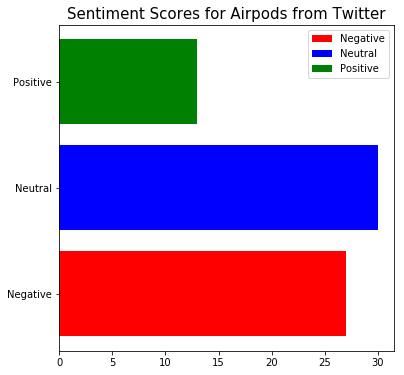

In [22]:
sentiment_array = []
sentiment = ''
def sentimentScore():
 polarity = data['polarity']
 for key, value in polarity.items():
   compound = value['compound']
   if(compound >= 0.05):
     sentiment = 'positive'
   if(compound > -0.05 and compound < 0.05):
     sentiment = 'neutral'
   elif(compound <= -0.05):
     sentiment = 'negative'
   sentiment_array.append(sentiment)
 #print(sentiment_array)

 neutral = sentiment_array.count('neutral')
 negative = sentiment_array.count('negative')
 positive = sentiment_array.count('positive')
 data_array = [negative, neutral, positive]
 #print(data_array)
 
 sentiments = "Negative", "Neutral", "Positive"
 register = 0, 1, 2
 plt.figure(figsize = (6, 6))
 graph = plt.barh(register, data_array, height = 0.8, color = ("r", "b", "g"))
 plt.title("Sentiment Scores for Airpods from Twitter", fontsize = 15)
 plt.legend(graph, sentiments, fontsize = 10)
 plt.yticks(register, sentiments)
 plt.show()
  
sentimentScore()


